<a href="https://colab.research.google.com/github/Marjvyas/Marjvyas/blob/main/spi_guess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
df=pd.read_excel('/content/sample_data/24 A-2 Gujrat.xlsx', skiprows=1)

df=df.drop(index=[0,2])
df = df.reset_index(drop=True)
df.head(16)
df.columns

Index(['State Code', 'District Code', 'State/District', 'Census Year',
       'Persons', 'Variation since the preceding census ', 'Unnamed: 6',
       'Males', 'Females'],
      dtype='object')

In [ ]:
df1=df.iloc[0:13]
df1.drop(columns=['Unnamed: 6', 'State Code', 'District Code', 'State/District'],index=0, inplace=True)
df1.reset_index(inplace=True, drop=True)
df1

/tmp/ipython-input-72-1668279413.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=['Unnamed: 6', 'State Code', 'District Code', 'State/District'],index=0, inplace=True)


,Census Year,Persons,Variation since the preceding census,Males,Females
0,1901.0,9094748.0,-----,4654875.0,4439873.0
1,1911.0,9803587.0,708839,5037852.0,4765735.0
2,1921.0,10174989.0,371402,5233462.0,4941527.0
3,1931.0,11489828.0,1314839,5906646.0,5583182.0
4,1941.0,13701551.0,2211723,7060352.0,6641199.0
5,1951.0,16262657.0,2561106,8331922.0,7930735.0
6,1961.0,20633350.0,4370693,10633902.0,9999448.0
7,1971.0,26697475.0,6064125,13802494.0,12894981.0
8,1981.0,34085799.0,7388324,17552640.0,16533159.0
9,1991.0,41309582.0,7223783,21355209.0,19954373.0


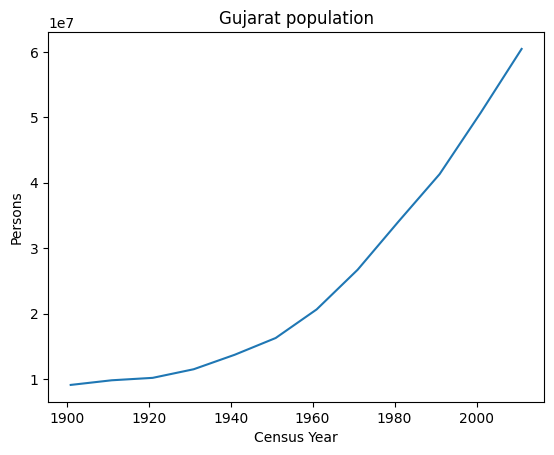

In [ ]:
plt.plot(df1['Census Year'], df1['Persons'])
plt.xlabel('Census Year')
plt.ylabel('Persons')
plt.title('Gujarat population')
plt.show()

In [ ]:
x=df1[['Census Year']]
y=df1['Persons']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [ ]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(x_test)

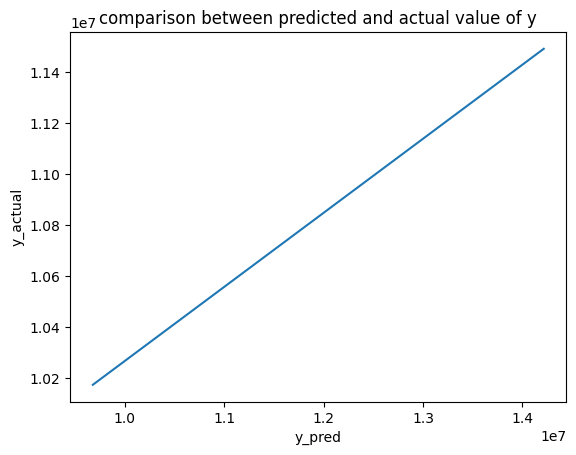

In [ ]:
plt.plot(y_pred, y_test)
plt.xlabel('y_pred')
plt.ylabel('y_actual')
plt.title('comparison between predicted and actual value of y')
plt.show()

In [ ]:
print('MSE: ',mean_squared_error(y_pred, y_test))
print('MAE: ', mean_absolute_error(y_pred, y_test))

MSE:  3834407001912.672
MAE:  1609570.6538461447


In [ ]:
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, y_pred))

R² Score: -7.871826613209329


In [ ]:
future_year=pd.DataFrame({'Census Year': [2022]})
future_year

,Census Year
0,2022


In [ ]:
pred = model.predict(future_year)

In [ ]:
print("Predicted population in 2022:", int(pred[0]))

Predicted population in 2022: 55473827
